In [205]:
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [206]:
df = pd.read_excel('./dataset/RSW-dataset.xlsx')

In [207]:
df

,NUGGET.WIDTH.1,MATERIAL.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,MATERIAL.2,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
0,3.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0
1,4.4,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0
2,4.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0
3,4.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0
4,5.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,4.6,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,700.0
1122,4.8,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,700.0
1123,4.6,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,750.0
1124,4.7,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,750.0


In [208]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [209]:
print('train_df.shape:', train_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (900, 16)
test_df.shape: (226, 16)


In [210]:
input_cols = list(train_df.columns)[1:]
target_col = 'NUGGET.WIDTH.1'

In [211]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [212]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [213]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [214]:
train_inputs[numeric_cols].describe()

,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,1.197944,0.008889,0.567778,40.195556,1.864444,1.348167,0.0,0.567778,40.195556,1.864444,884.811111,7.960633,357.078822
std,0.161210,0.093913,0.495660,36.312045,0.991321,0.315293,0.0,0.495660,36.312045,0.991321,123.369869,1.738287,161.560156
min,0.800000,0.000000,0.000000,0.000000,1.000000,0.800000,0.0,0.000000,0.000000,1.000000,499.000000,4.200000,166.700000
25%,1.200000,0.000000,0.000000,0.000000,1.000000,1.200000,0.0,0.000000,0.000000,1.000000,899.000000,6.700000,250.050000
50%,1.200000,0.000000,1.000000,60.000000,1.000000,1.200000,0.0,1.000000,60.000000,1.000000,910.000000,8.100000,300.060000
75%,1.200000,0.000000,1.000000,70.000000,3.000000,1.400000,0.0,1.000000,70.000000,3.000000,910.000000,9.100000,400.000000
max,1.500000,1.000000,1.000000,94.000000,3.000000,2.000000,0.0,1.000000,94.000000,3.000000,1124.000000,13.500000,800.000000


In [215]:
train_inputs[categorical_cols].nunique()

MATERIAL.1    5
MATERIAL.2    5
dtype: int64

In [216]:
df[categorical_cols].nunique()

MATERIAL.1    5
MATERIAL.2    5
dtype: int64

In [217]:
train_inputs.describe().loc[['min', 'max']]

,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
min,0.8,0.0,0.0,0.0,1.0,0.8,0.0,0.0,0.0,1.0,499.0,4.2,166.7
max,1.5,1.0,1.0,94.0,3.0,2.0,0.0,1.0,94.0,3.0,1124.0,13.5,800.0


In [218]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [219]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [220]:
train_inputs.describe().loc[['min', 'max']]

,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [221]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [222]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [223]:
encoder.categories_

[array(['Material_A', 'Material_B', 'Material_C', 'Material_D',
        'Material_E'], dtype=object),
 array(['Material_A', 'Material_B', 'Material_C', 'Material_D',
        'Material_E'], dtype=object)]

In [224]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['MATERIAL.1_Material_A', 'MATERIAL.1_Material_B', 'MATERIAL.1_Material_C', 'MATERIAL.1_Material_D', 'MATERIAL.1_Material_E', 'MATERIAL.2_Material_A', 'MATERIAL.2_Material_B', 'MATERIAL.2_Material_C', 'MATERIAL.2_Material_D', 'MATERIAL.2_Material_E']


In [225]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [226]:
train_inputs

,MATERIAL.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,MATERIAL.2,THICKNESS.2,COATING.EG.2,COATING.HDG.2,...,MATERIAL.1_Material_A,MATERIAL.1_Material_B,MATERIAL.1_Material_C,MATERIAL.1_Material_D,MATERIAL.1_Material_E,MATERIAL.2_Material_A,MATERIAL.2_Material_B,MATERIAL.2_Material_C,MATERIAL.2_Material_D,MATERIAL.2_Material_E
875,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
712,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
554,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
688,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
780,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Material_B,0.571429,0.0,1.0,0.744681,0.0,Material_B,0.333333,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
121,Material_A,0.857143,0.0,1.0,0.744681,0.0,Material_A,0.500000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1044,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1095,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [227]:
test_inputs

,MATERIAL.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,MATERIAL.2,THICKNESS.2,COATING.EG.2,COATING.HDG.2,...,MATERIAL.1_Material_A,MATERIAL.1_Material_B,MATERIAL.1_Material_C,MATERIAL.1_Material_D,MATERIAL.1_Material_E,MATERIAL.2_Material_A,MATERIAL.2_Material_B,MATERIAL.2_Material_C,MATERIAL.2_Material_D,MATERIAL.2_Material_E
1090,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1083,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
739,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140,Material_A,0.857143,0.0,1.0,0.744681,0.0,Material_A,0.500000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1018,Material_D,0.571429,0.0,1.0,0.744681,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Material_B,0.000000,1.0,1.0,0.531915,0.0,Material_B,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
429,Material_B,0.571429,0.0,1.0,0.744681,0.0,Material_B,0.333333,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12,Material_E,0.000000,0.0,0.0,0.000000,1.0,Material_E,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1035,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [228]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (900, 25)
train_targets: (900,)
test_inputs: (226, 25)
test_targets: (226,)


In [229]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [230]:
def evalute(targets, predictions,  name=''):
    mae = mean_absolute_error(targets, predictions)
    mse = mean_squared_error(targets, predictions)
    rmse =  root_mean_squared_error(targets, predictions)
    
    print(name)
    print("mae:", mae)
    print("mse:", mse)
    print("rmse=", rmse)

# Linear regression 


In [231]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [232]:
lr_model = LinearRegression(fit_intercept=False, positive=False)
lr_model.fit(X_train_poly, train_targets)

LinearRegression(fit_intercept=False)

In [233]:
train_preds = lr_model.predict(X_train_poly)
evalute(train_targets, train_preds, "Training")

Training
mae: 1.214241469870373
mse: 2.584743623137901
rmse= 1.6077137876929155


In [234]:
test_preds = lr_model.predict(X_test_poly)
evalute(test_targets, test_preds, "Testing")

Testing
mae: 1.1479336978394687
mse: 2.3501428266483346
rmse= 1.5330175558839287


In [235]:
lr_model.score(X_train_poly, train_targets)

0.5913386472038189

In [236]:
lr_model.score(X_test_poly, test_targets)

0.5812518207433804

In [237]:


param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}

grid_search = GridSearchCV(
    LinearRegression(),
    param_grid,
    cv=5,
    scoring='r2'
)

grid_search.fit(X_train, train_targets)

print("Best parameters:", grid_search.best_params_)
print("Best cross-val score:", grid_search.best_score_)

Best parameters: {'fit_intercept': False, 'positive': False}
Best cross-val score: 0.5224195558547049


# Random Forest


In [238]:
rf_model = RandomForestRegressor(
    max_depth=5,  
    max_features='sqrt',  
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=300,
)
rf_model.fit(X_train, train_targets)


RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=5,
                      n_estimators=300)

In [239]:
train_preds = rf_model.predict(X_train)
evalute(train_targets, train_preds, "Training")

Training
mae: 1.223136192630809
mse: 2.4803045992397825
rmse= 1.5748982821883395


In [240]:
test_preds = rf_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")

Testing
mae: 1.2214480033360309
mse: 2.397332959534034
rmse= 1.5483323156008963


In [241]:
rf_model.score(X_train, train_targets)

0.6078509977552844

In [242]:
rf_model.score(X_test, test_targets)

0.5728434882792015

In [243]:
scores = cross_val_score(rf_model, X_train, train_targets, cv=5)
print("Cross-validation scores:", scores)
print("Average:", scores.mean())

Cross-validation scores: [0.57600834 0.53836385 0.58792191 0.53216508 0.5487134 ]
Average: 0.556634517560997


In [244]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, train_targets)
print("Best parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV R²: 0.5560719123999757


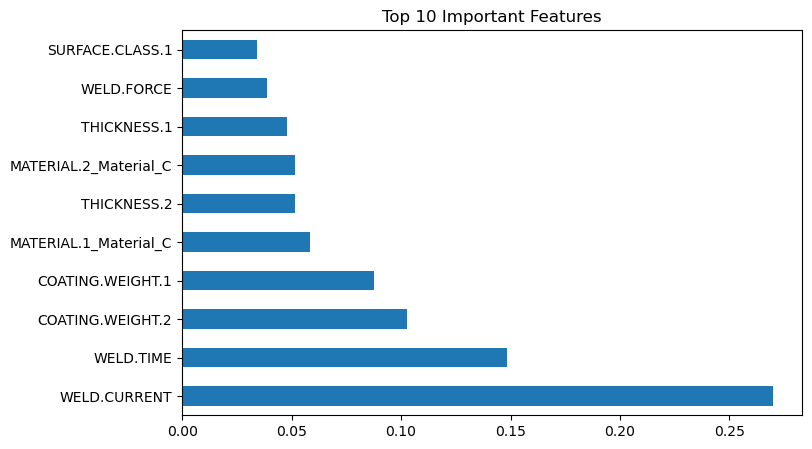

In [245]:
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_importances[:10].plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [246]:
top_features = feat_importances.head(8).index

In [247]:
rf_model.fit(X_train[top_features], train_targets)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=5,
                      n_estimators=300)

In [248]:
train_preds = rf_model.predict(X_train[top_features])
evalute(train_targets, train_preds, "Training")

Training
mae: 1.2126227353961005
mse: 2.4498240893001135
rmse= 1.56519139062931


# K-Nearest Neighbors (KNN) 

In [257]:
knn_model = KNeighborsRegressor(n_neighbors=15, p=2, weights='uniform')
knn_model.fit(X_train, train_targets)

KNeighborsRegressor(n_neighbors=15)

In [258]:
train_preds = knn_model.predict(X_train)
evalute(train_targets, train_preds, "Training")


Training
mae: 1.1676296296296298
mse: 2.434485827160494
rmse= 1.5602838931298668


In [259]:
test_preds = knn_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")

Testing
mae: 1.2094395280235988
mse: 2.6092613569321537
rmse= 1.6153208216735626


In [260]:
knn_model.score(X_train, train_targets)

0.6150951829091877

In [261]:
knn_model.score(X_test, test_targets)

0.5350821107420756

In [262]:
scores = cross_val_score(knn_model, X_train, train_targets, cv=5)
print("Cross-validation scores:", scores)
print("Average:", scores.mean())

Cross-validation scores: [0.55706282 0.51656174 0.57954258 0.55095589 0.55795461]
Average: 0.552415526947311


In [255]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, train_targets)
print("Best parameters:", grid_search.best_params_)
print("Best cross-val score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
Best cross-val score: 0.5514571395914901
